In [14]:
from pymc3 import Model, Normal, invlogit, Binomial, sample
from arviz import plot_forest
import numpy as np

In [16]:
# Data
n = np.ones(4) * 5
y = np.array([0, 1, 3, 5])
dose = np.array([-.86, -.3, -.05, .73])

In [18]:
with Model() as bioassay_model:
    # Prior distributions for latent variables
    alpha = Normal('alpha')
    beta = Normal('beta')
    # Linear combinations of parameters
    theta = invlogit(alpha + beta*dose)

c:\users\balde\appdata\local\programs\python\python37\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\balde\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\balde\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 39 seconds.


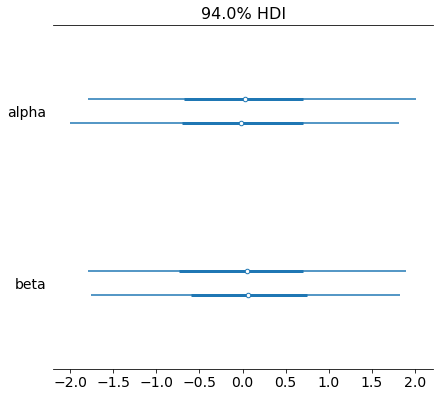

In [23]:
with bioassay_model:
    # Draw samples
    trace = sample(1000, n_init=2)
    # Plot two parameters
    plot_forest(trace, var_names=['alpha', 'beta'])